In [2]:
from datasets import load_dataset

ds = load_dataset("danjacobellis/chexpert")

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

train-00000-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00001-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00002-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00003-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00004-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00005-of-00023.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00006-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00007-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00008-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00009-of-00023.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00010-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00011-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00012-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00013-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00014-of-00023.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00015-of-00023.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00016-of-00023.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

train-00017-of-00023.parquet:   0%|          | 0.00/524M [00:00<?, ?B/s]

train-00018-of-00023.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00019-of-00023.parquet:   0%|          | 0.00/520M [00:00<?, ?B/s]

train-00020-of-00023.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00021-of-00023.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00022-of-00023.parquet:   0%|          | 0.00/516M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/223414 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/234 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices', 'image'],
        num_rows: 223414
    })
    validation: Dataset({
        features: ['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices', 'image'],
        num_rows: 234
    })
})

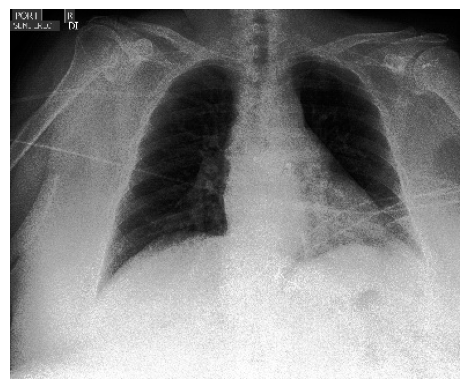

In [5]:
import matplotlib.pyplot as plt

sample = ds["train"][0]  # pick the first record
img = sample["image"]  # this is already a PIL image

plt.imshow(img, cmap="gray")  # chest X-rays are grayscale
plt.axis("off")
plt.show()

In [6]:
small_train = ds["train"].shuffle(seed=42).select(range(2000))
small_val = ds["validation"]  # it's already tiny

In [7]:
import pandas as pd

# Drop the actual image objects; keep everything else
train_df = small_train.remove_columns(["image"]).to_pandas()
val_df = small_val.remove_columns(["image"]).to_pandas()

train_df.to_csv("chexpert_train_small.csv", index=False)
val_df.to_csv("chexpert_val_small.csv", index=False)

In [8]:
import os
import pandas as pd
from tqdm import tqdm  # pip install tqdm if needed

label_cols = [
    "No Finding",
    "Enlarged Cardiomediastinum",
    "Cardiomegaly",
    "Lung Opacity",
    "Lung Lesion",
    "Edema",
    "Consolidation",
    "Pneumonia",
    "Atelectasis",
    "Pneumothorax",
    "Pleural Effusion",
    "Pleural Other",
    "Fracture",
    "Support Devices",
]


def export_split(hf_split, out_img_dir, csv_path, split_name="train"):
    os.makedirs(out_img_dir, exist_ok=True)
    rows = []

    for i, example in enumerate(tqdm(hf_split, desc=f"Exporting {split_name}")):
        img = example["image"]  # PIL image
        img_filename = f"{split_name}_{i:06d}.png"
        img_path = os.path.join(out_img_dir, img_filename)
        img.save(img_path)

        row = {
            "filepath": img_path,
            "Sex": example["Sex"],
            "Age": example["Age"],
            "Frontal/Lateral": example["Frontal/Lateral"],
            "AP/PA": example["AP/PA"],
        }
        for col in label_cols:
            row[col] = example[col]
        rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(csv_path, index=False)


# Use the smaller subsets
export_split(small_train, "images_train_small", "labels_train_small.csv", "train")
export_split(small_val, "images_val_small", "labels_val_small.csv", "val")

Exporting val: 100%|██████████| 234/234 [00:00<00:00, 392.25it/s]
